In [710]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [711]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training12.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.288964,0.288900,0.237060,0.751485,0.490417,0.871241,0.865572,0.127085,0.386851,0.0,...,0.878061,0,0.000000,0.0,0.0,0.0,0.878061,0.0,0,208500
1,0.089223,0.343729,0.262077,0.610590,0.764289,0.820615,0.815275,0.000000,0.514486,0.0,...,0.842986,0,0.000000,0.0,0.0,0.0,0.842986,0.0,0,181500
2,0.277911,0.287757,0.312420,0.717292,0.467697,0.830206,0.825241,0.101427,0.257144,0.0,...,0.847863,0,0.000000,0.0,0.0,0.0,0.847863,0.0,0,223500
3,0.323125,0.252112,0.260167,0.716555,0.467473,0.792212,0.810866,0.000000,0.113340,0.0,...,0.840844,0,0.846186,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.249337,0.320285,0.360368,0.735365,0.415464,0.737297,0.732499,0.197518,0.312378,0.0,...,0.764231,0,0.000000,0.0,0.0,0.0,0.764231,0.0,0,250000


In [712]:
corr=df.corr()

In [713]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.142333,0.153551,0.334565,0.524853,-0.315803,-0.472650,-0.499125,0.430345,0.332447,-0.033716,...,-0.354417,NaN,-0.131030,-0.050800,-0.019783,-0.048756,-0.249486,0.333237,NaN,1.000000
GrLivArea,0.120719,0.127222,0.008331,0.458779,-0.189161,-0.218697,-0.219837,0.314464,0.031921,-0.061258,...,-0.151926,NaN,-0.057856,-0.043154,0.007535,-0.002907,-0.103951,0.118027,NaN,0.607572
BsmtQual_Ex,-0.067336,0.110156,0.067300,0.348260,-0.213320,-0.159737,-0.176944,0.292843,0.219931,-0.043845,...,-0.294995,NaN,-0.055523,-0.015651,-0.027086,-0.035153,-0.231383,0.342712,NaN,0.530566
TotalBsmtSF,-0.249588,0.188220,0.075357,0.407939,-0.225604,-0.121166,-0.151733,0.281911,0.423329,0.085864,...,-0.222430,NaN,-0.033628,-0.063965,-0.074703,0.025350,-0.163098,0.229862,NaN,0.526490
GarageCars,-0.018763,0.150428,0.031077,0.494672,-0.234319,-0.088925,-0.128104,0.308173,0.161393,-0.066607,...,-0.213203,NaN,-0.114808,-0.109711,0.015857,-0.012673,-0.130096,0.257483,NaN,0.524947
OverallQual,0.168467,0.066253,-0.315555,1.000000,0.013580,0.245853,0.217332,0.300476,0.115412,-0.102320,...,-0.132284,NaN,-0.088225,-0.040849,-0.075064,-0.019867,-0.064936,0.266964,NaN,0.524853
GarageArea,-0.093239,0.183610,0.084616,0.432730,-0.215405,-0.131911,-0.167525,0.309273,0.214881,-0.039942,...,-0.235569,NaN,-0.102522,-0.106532,-0.014841,-0.017159,-0.141364,0.262419,NaN,0.524351
KitchenQual_Ex,-0.045219,0.075053,0.082089,0.310253,-0.121018,-0.163811,-0.169290,0.214144,0.184403,-0.036469,...,-0.210962,NaN,0.004694,-0.014103,-0.024406,-0.031675,-0.205273,0.250091,NaN,0.481160
1stFlrSF,-0.239974,0.213064,0.017884,0.329802,-0.200665,-0.126223,-0.145328,0.251188,0.333430,0.065461,...,-0.210962,NaN,-0.033945,-0.040522,0.046827,0.030706,-0.160864,0.182668,NaN,0.467500
Foundation_PConc,0.095374,0.006098,-0.093198,0.553635,-0.264221,0.063893,0.026830,0.159577,0.056796,-0.147740,...,-0.176319,NaN,-0.095768,0.007612,-0.043421,-0.035719,-0.139283,0.306872,NaN,0.443080


In [714]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [715]:
model=GradientBoostingRegressor()

In [716]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [717]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'BsmtQual_Ex', 'TotalBsmtSF', 'GarageCars',
       'OverallQual', 'GarageArea', 'KitchenQual_Ex', '1stFlrSF',
       'Foundation_PConc'],
      dtype='object')

In [718]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120,10):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,23503.496698,36970.888452,0.821801
1,20,21467.460310,32628.734798,0.861201
2,30,18310.439542,28813.442276,0.891763
3,40,18374.822244,29465.865265,0.886806
4,50,18033.793591,28501.882371,0.894091
5,60,18097.853650,28660.721714,0.892907
6,70,17572.834989,28068.659014,0.897286
7,80,17409.686476,27030.620676,0.904743
8,90,17882.884917,28094.596841,0.897096
9,100,17579.439863,27221.940162,0.903390


In [719]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
7,80,17409.686476,27030.620676,0.904743
6,70,17572.834989,28068.659014,0.897286
9,100,17579.439863,27221.940162,0.903390
10,110,17664.255807,27343.001306,0.902528
8,90,17882.884917,28094.596841,0.897096
4,50,18033.793591,28501.882371,0.894091
5,60,18097.853650,28660.721714,0.892907
2,30,18310.439542,28813.442276,0.891763
3,40,18374.822244,29465.865265,0.886806
1,20,21467.460310,32628.734798,0.861201


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


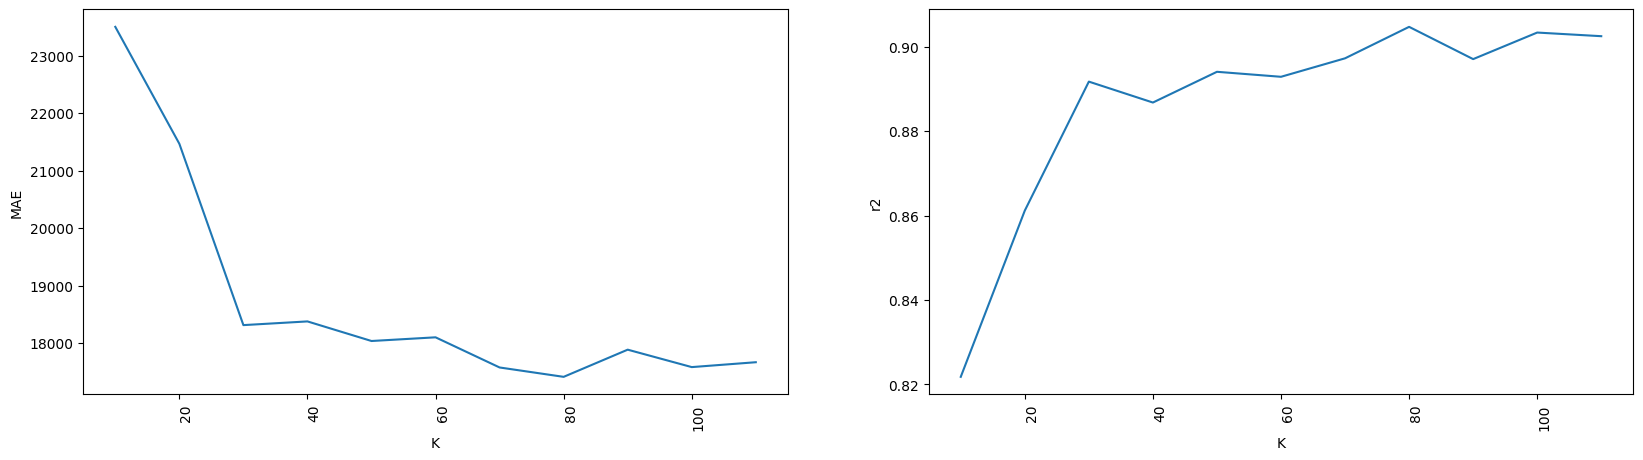

In [720]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [721]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               4.528134e-02
LotFrontage              7.087096e-03
LotArea                  1.397675e-02
OverallQual              1.971269e-02
OverallCond              1.660969e-02
                             ...     
SaleCondition_Family     1.050945e-02
SaleCondition_Normal     1.118082e-01
SaleCondition_Partial    5.743050e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [722]:
varr.loc[varr > 0.1].index

Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SalePrice'],
      dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [723]:
from sklearn.feature_selection import VarianceThreshold

In [724]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SalePrice'],
      dtype='object')

In [725]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500,10):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic_var=pd.DataFrame(statistic_tup)
statistic_var

,K,MAE,RMSE,r2
0,100,16695.184241,25973.681009,0.912046
1,110,16583.433446,25882.998332,0.912660
2,120,16599.620794,26109.471013,0.911124
3,130,16924.737389,27009.427193,0.904892
4,140,16839.060306,26540.665721,0.908165
5,150,17072.240845,27584.703353,0.900797
6,160,16797.001900,26665.233339,0.907301
7,170,16679.151689,26102.035451,0.911175
8,180,16939.799544,27113.886804,0.904155
9,190,16874.172474,26517.750220,0.908323


In [726]:
statistic_var.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
39,490,16444.566895,26039.972041,0.911597
21,310,16538.927696,25827.493767,0.913034
38,480,16556.647340,26091.087705,0.911250
1,110,16583.433446,25882.998332,0.912660
2,120,16599.620794,26109.471013,0.911124
28,380,16640.018642,26196.342687,0.910532
13,230,16654.963931,26343.378837,0.909525
24,340,16659.357973,26141.988541,0.910903
14,240,16669.035033,26137.274790,0.910935
37,470,16675.886023,26263.599606,0.910072


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


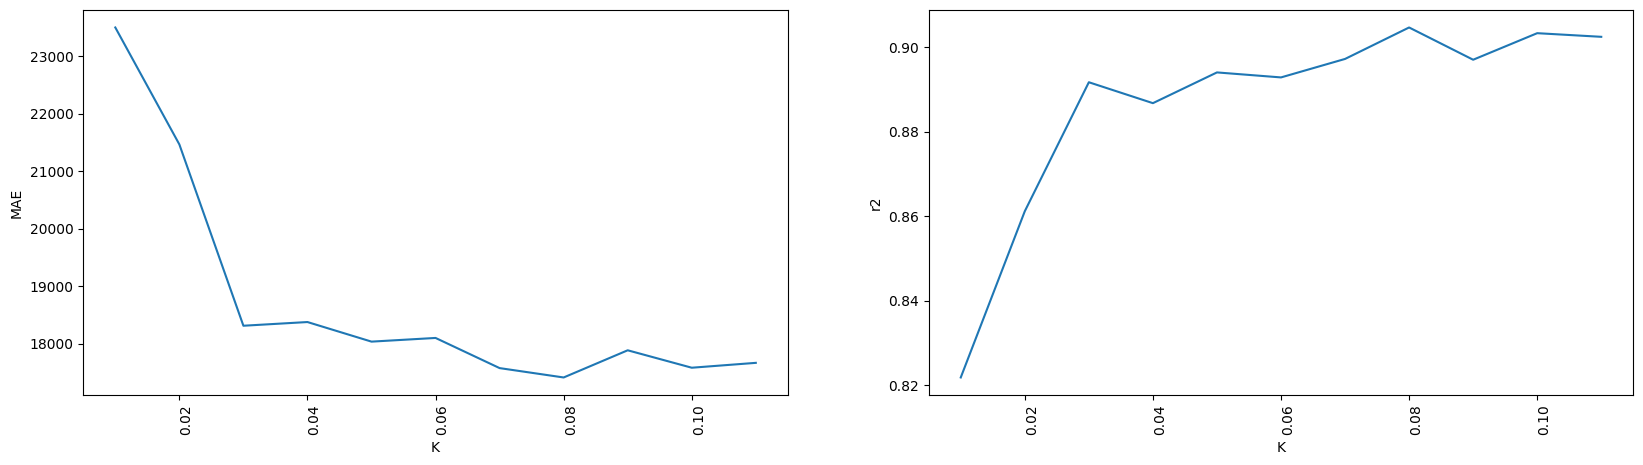

In [727]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


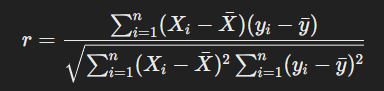

### Using numpy

In [728]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [729]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.5248525198657469


In [730]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['GrLivArea', 0.6075721273224743]]

### Using sklearn

In [731]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'BsmtQual_Ex'], dtype=object)

In [732]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120,10):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,23446.924734,35215.810972,0.838318
1,15,21977.904469,33357.998120,0.854927
2,25,18196.894939,29191.247112,0.888906
3,35,18406.321721,29343.342909,0.887745
4,45,18342.143721,29376.508974,0.887491
5,55,17649.325494,27485.057434,0.901513
6,65,17685.084868,28298.875403,0.895594
7,75,17761.456622,28180.759440,0.896464
8,85,17514.482639,27325.985028,0.902650
9,95,17991.165841,28478.662467,0.894263


In [733]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
8,85,17514.482639,27325.985028,0.902650
10,105,17585.765394,27068.234632,0.904477
5,55,17649.325494,27485.057434,0.901513
11,115,17658.168549,27188.487377,0.903627
6,65,17685.084868,28298.875403,0.895594
7,75,17761.456622,28180.759440,0.896464
9,95,17991.165841,28478.662467,0.894263
2,25,18196.894939,29191.247112,0.888906
4,45,18342.143721,29376.508974,0.887491
3,35,18406.321721,29343.342909,0.887745


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


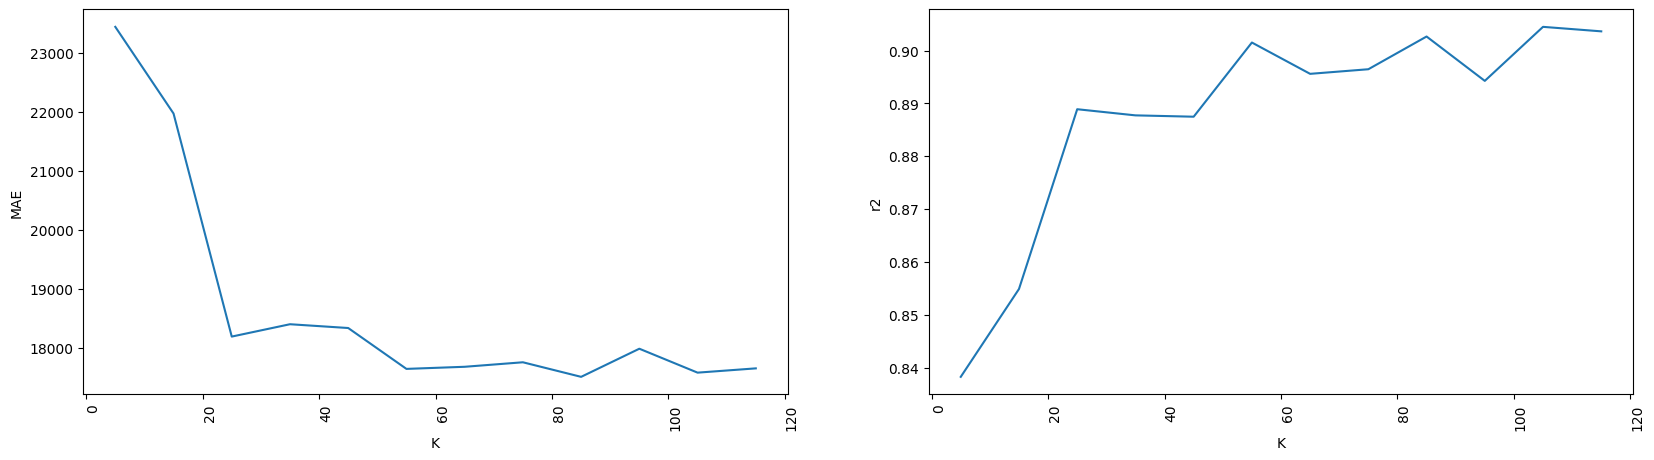

In [734]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

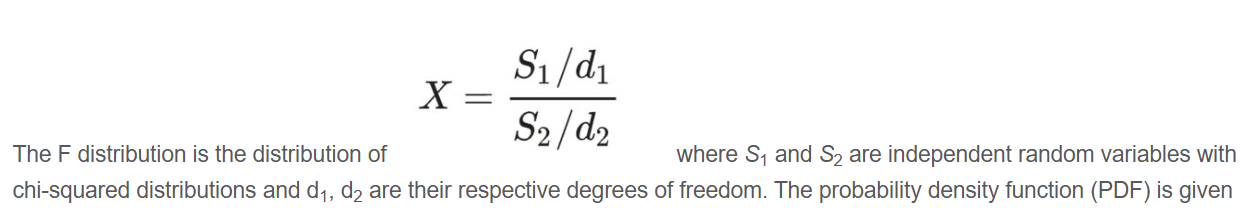

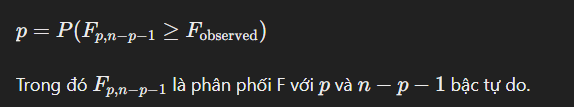

In [735]:
from sklearn.feature_selection import f_regression

In [736]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120,10):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,23945.387199,35745.657507,0.833416
1,15,19498.212358,30441.732318,0.879184
2,25,19276.356097,29897.367076,0.883466
3,35,18491.212478,27654.911988,0.900292
4,45,16347.773944,25900.731208,0.912540
5,55,16223.170849,25621.386275,0.914416
6,65,16617.586242,25551.798821,0.914880
7,75,16449.329455,24815.688792,0.919714
8,85,16954.211719,27027.001615,0.904768
9,95,16712.726151,25926.422967,0.912366


In [737]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
5,55,16223.170849,25621.386275,0.914416
4,45,16347.773944,25900.731208,0.912540
7,75,16449.329455,24815.688792,0.919714
11,115,16464.757508,25453.894693,0.915532
6,65,16617.586242,25551.798821,0.914880
10,105,16652.339920,26073.984172,0.911366
9,95,16712.726151,25926.422967,0.912366
8,85,16954.211719,27027.001615,0.904768
3,35,18491.212478,27654.911988,0.900292
2,25,19276.356097,29897.367076,0.883466


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


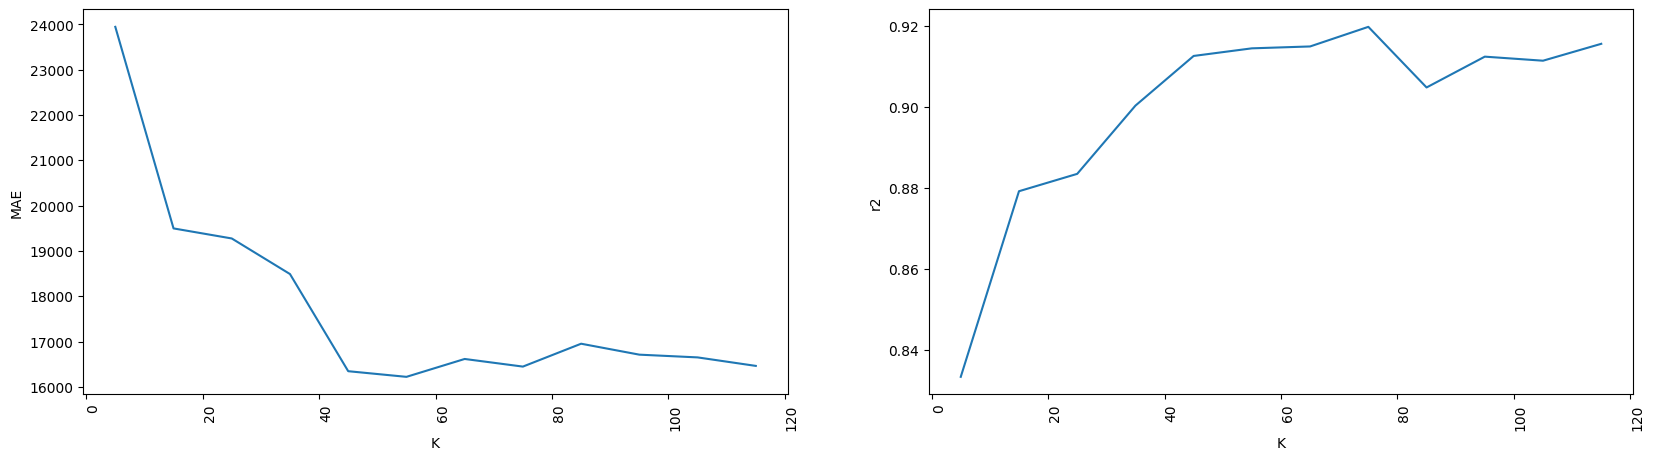

In [738]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

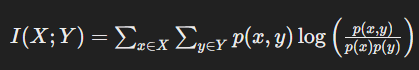

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

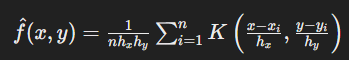

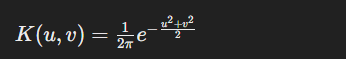

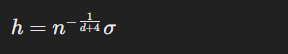

In [739]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [740]:
from sklearn.feature_selection import mutual_info_regression

In [741]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120,10):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,28221.227490,46221.504810,0.721468
1,15,25387.162955,37132.308104,0.820241
2,25,20684.562547,29119.070751,0.889454
3,35,20596.914882,28731.826641,0.892375
4,45,19417.435833,29043.794702,0.890025
5,55,17653.688877,27742.811964,0.899657
6,65,18435.622561,29441.213595,0.886995
7,75,17540.089707,27903.430884,0.898492
8,85,16888.043826,26777.698915,0.906517
9,95,17197.895304,27218.720179,0.903412


In [742]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [743]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
8,85,16888.043826,26777.698915,0.906517
10,105,17037.328974,27375.553482,0.902296
11,115,17065.264954,27716.545605,0.899847
9,95,17197.895304,27218.720179,0.903412
7,75,17540.089707,27903.430884,0.898492
5,55,17653.688877,27742.811964,0.899657
6,65,18435.622561,29441.213595,0.886995
4,45,19417.435833,29043.794702,0.890025
3,35,20596.914882,28731.826641,0.892375
2,25,20684.562547,29119.070751,0.889454


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


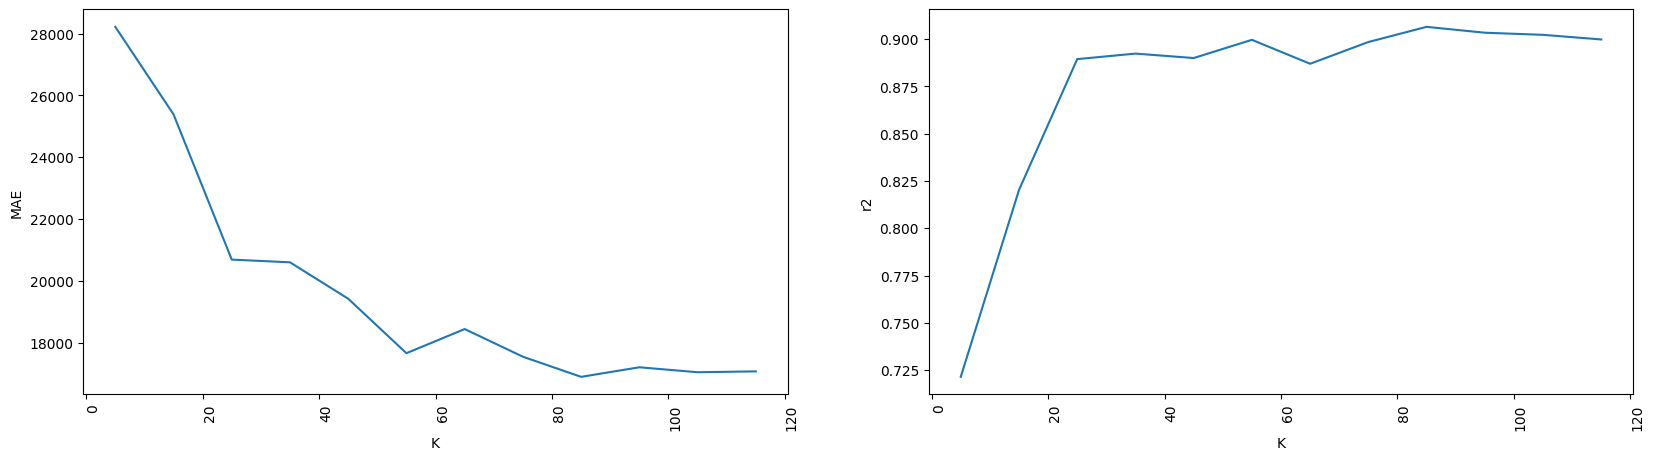

In [744]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [745]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,23446.924734,35215.810972,0.838318
1,15,21977.904469,33357.998120,0.854927
2,25,18196.894939,29191.247112,0.888906
3,35,18406.321721,29343.342909,0.887745
4,45,18342.143721,29376.508974,0.887491
5,55,17649.325494,27485.057434,0.901513
6,65,17685.084868,28298.875403,0.895594
7,75,17761.456622,28180.759440,0.896464
8,85,17514.482639,27325.985028,0.902650
9,95,17991.165841,28478.662467,0.894263


In [746]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,23945.387199,35745.657507,0.833416
1,15,19498.212358,30441.732318,0.879184
2,25,19276.356097,29897.367076,0.883466
3,35,18491.212478,27654.911988,0.900292
4,45,16347.773944,25900.731208,0.912540
5,55,16223.170849,25621.386275,0.914416
6,65,16617.586242,25551.798821,0.914880
7,75,16449.329455,24815.688792,0.919714
8,85,16954.211719,27027.001615,0.904768
9,95,16712.726151,25926.422967,0.912366


In [747]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,28221.227490,46221.504810,0.721468
1,15,25387.162955,37132.308104,0.820241
2,25,20684.562547,29119.070751,0.889454
3,35,20596.914882,28731.826641,0.892375
4,45,19417.435833,29043.794702,0.890025
5,55,17653.688877,27742.811964,0.899657
6,65,18435.622561,29441.213595,0.886995
7,75,17540.089707,27903.430884,0.898492
8,85,16888.043826,26777.698915,0.906517
9,95,17197.895304,27218.720179,0.903412


In [748]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,23446.924734,35215.810972,0.838318,23945.387199,35745.657507,0.833416
1,15,21977.904469,33357.998120,0.854927,19498.212358,30441.732318,0.879184
2,25,18196.894939,29191.247112,0.888906,19276.356097,29897.367076,0.883466
3,35,18406.321721,29343.342909,0.887745,18491.212478,27654.911988,0.900292
4,45,18342.143721,29376.508974,0.887491,16347.773944,25900.731208,0.912540
5,55,17649.325494,27485.057434,0.901513,16223.170849,25621.386275,0.914416
6,65,17685.084868,28298.875403,0.895594,16617.586242,25551.798821,0.914880
7,75,17761.456622,28180.759440,0.896464,16449.329455,24815.688792,0.919714
8,85,17514.482639,27325.985028,0.902650,16954.211719,27027.001615,0.904768
9,95,17991.165841,28478.662467,0.894263,16712.726151,25926.422967,0.912366


In [749]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,23446.924734,35215.810972,0.838318,23945.387199,35745.657507,0.833416,28221.227490,46221.504810,0.721468
1,15,21977.904469,33357.998120,0.854927,19498.212358,30441.732318,0.879184,25387.162955,37132.308104,0.820241
2,25,18196.894939,29191.247112,0.888906,19276.356097,29897.367076,0.883466,20684.562547,29119.070751,0.889454
3,35,18406.321721,29343.342909,0.887745,18491.212478,27654.911988,0.900292,20596.914882,28731.826641,0.892375
4,45,18342.143721,29376.508974,0.887491,16347.773944,25900.731208,0.912540,19417.435833,29043.794702,0.890025
5,55,17649.325494,27485.057434,0.901513,16223.170849,25621.386275,0.914416,17653.688877,27742.811964,0.899657
6,65,17685.084868,28298.875403,0.895594,16617.586242,25551.798821,0.914880,18435.622561,29441.213595,0.886995
7,75,17761.456622,28180.759440,0.896464,16449.329455,24815.688792,0.919714,17540.089707,27903.430884,0.898492
8,85,17514.482639,27325.985028,0.902650,16954.211719,27027.001615,0.904768,16888.043826,26777.698915,0.906517
9,95,17991.165841,28478.662467,0.894263,16712.726151,25926.422967,0.912366,17197.895304,27218.720179,0.903412


In [750]:
columns=["Model", "feature_selection", "NOF", "Scaler", "Encoder" ,"Imputer", "R2", "MAE"]


In [751]:
df_result=pd.DataFrame(columns=columns)
df_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE


In [752]:
df_result["NOF"]=joint["K"]
df_result["R2"]=joint["r2"]
df_result["MAE"]=joint["MAE"]
df_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,NaN,NaN,5,NaN,NaN,NaN,0.721468,28221.227490
1,NaN,NaN,15,NaN,NaN,NaN,0.820241,25387.162955
2,NaN,NaN,25,NaN,NaN,NaN,0.889454,20684.562547
3,NaN,NaN,35,NaN,NaN,NaN,0.892375,20596.914882
4,NaN,NaN,45,NaN,NaN,NaN,0.890025,19417.435833
5,NaN,NaN,55,NaN,NaN,NaN,0.899657,17653.688877
6,NaN,NaN,65,NaN,NaN,NaN,0.886995,18435.622561
7,NaN,NaN,75,NaN,NaN,NaN,0.898492,17540.089707
8,NaN,NaN,85,NaN,NaN,NaN,0.906517,16888.043826
9,NaN,NaN,95,NaN,NaN,NaN,0.903412,17197.895304


In [753]:
df_result["Model"]="GradientBoostRG"
df_result["feature_selection"]="UFS"


In [754]:
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,23446.924734,35215.810972,0.838318,23945.387199,35745.657507,0.833416,28221.227490,46221.504810,0.721468
1,15,21977.904469,33357.998120,0.854927,19498.212358,30441.732318,0.879184,25387.162955,37132.308104,0.820241
2,25,18196.894939,29191.247112,0.888906,19276.356097,29897.367076,0.883466,20684.562547,29119.070751,0.889454
3,35,18406.321721,29343.342909,0.887745,18491.212478,27654.911988,0.900292,20596.914882,28731.826641,0.892375
4,45,18342.143721,29376.508974,0.887491,16347.773944,25900.731208,0.912540,19417.435833,29043.794702,0.890025
5,55,17649.325494,27485.057434,0.901513,16223.170849,25621.386275,0.914416,17653.688877,27742.811964,0.899657
6,65,17685.084868,28298.875403,0.895594,16617.586242,25551.798821,0.914880,18435.622561,29441.213595,0.886995
7,75,17761.456622,28180.759440,0.896464,16449.329455,24815.688792,0.919714,17540.089707,27903.430884,0.898492
8,85,17514.482639,27325.985028,0.902650,16954.211719,27027.001615,0.904768,16888.043826,26777.698915,0.906517
9,95,17991.165841,28478.662467,0.894263,16712.726151,25926.422967,0.912366,17197.895304,27218.720179,0.903412


In [755]:
df_var=pd.DataFrame(columns=columns)
df_var

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE


In [756]:
df_var["NOF"]=statistic_var["K"]
df_var["R2"]=statistic_var["r2"]
df_var["MAE"]=statistic_var["MAE"]
df_var["Model"]="GradientBoostRG"
df_var["feature_selection"]="VarianceThreshold"
df_var

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,NaN,NaN,NaN,0.912046,16695.184241
1,GradientBoostRG,VarianceThreshold,110,NaN,NaN,NaN,0.912660,16583.433446
2,GradientBoostRG,VarianceThreshold,120,NaN,NaN,NaN,0.911124,16599.620794
3,GradientBoostRG,VarianceThreshold,130,NaN,NaN,NaN,0.904892,16924.737389
4,GradientBoostRG,VarianceThreshold,140,NaN,NaN,NaN,0.908165,16839.060306
5,GradientBoostRG,VarianceThreshold,150,NaN,NaN,NaN,0.900797,17072.240845
6,GradientBoostRG,VarianceThreshold,160,NaN,NaN,NaN,0.907301,16797.001900
7,GradientBoostRG,VarianceThreshold,170,NaN,NaN,NaN,0.911175,16679.151689
8,GradientBoostRG,VarianceThreshold,180,NaN,NaN,NaN,0.904155,16939.799544
9,GradientBoostRG,VarianceThreshold,190,NaN,NaN,NaN,0.908323,16874.172474


In [757]:
df_last_result=pd.concat([df_var,df_result],axis=0,ignore_index=True)
df_last_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,NaN,NaN,NaN,0.912046,16695.184241
1,GradientBoostRG,VarianceThreshold,110,NaN,NaN,NaN,0.912660,16583.433446
2,GradientBoostRG,VarianceThreshold,120,NaN,NaN,NaN,0.911124,16599.620794
3,GradientBoostRG,VarianceThreshold,130,NaN,NaN,NaN,0.904892,16924.737389
4,GradientBoostRG,VarianceThreshold,140,NaN,NaN,NaN,0.908165,16839.060306
5,GradientBoostRG,VarianceThreshold,150,NaN,NaN,NaN,0.900797,17072.240845
6,GradientBoostRG,VarianceThreshold,160,NaN,NaN,NaN,0.907301,16797.001900
7,GradientBoostRG,VarianceThreshold,170,NaN,NaN,NaN,0.911175,16679.151689
8,GradientBoostRG,VarianceThreshold,180,NaN,NaN,NaN,0.904155,16939.799544
9,GradientBoostRG,VarianceThreshold,190,NaN,NaN,NaN,0.908323,16874.172474


In [758]:
df_statistic=pd.read_csv(r"C:\Users\NTCUONG\notebook\cnt-first-project\eda+model_LR\statistic_training_dataset.csv")
df_statistic

,DATASET,ENCODER,IMPUTER,NORMALIZER
0,training1.csv,LabelEncoder,simpleimputer,none
1,training2.csv,LabelEncoder,simpleimputer,normalizer
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler
3,training4.csv,LabelEncoder,knnimputer,none
4,training5.csv,LabelEncoder,knnimputer,normalizer
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler
6,training7.csv,OnehotEncoder,simpleimputer,none
7,training8.csv,OnehotEncoder,simpleimputer,normalizer
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler
9,training10.csv,OnehotEncoder,knnimputer,none


# Note

In [759]:
df_last_result["Scaler"]="Minmaxscaler"
df_last_result["Encoder"]="OnehotEncoder"
df_last_result["Imputer"]="KnnImputer"
df_last_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,Minmaxscaler,OnehotEncoder,KnnImputer,0.912046,16695.184241
1,GradientBoostRG,VarianceThreshold,110,Minmaxscaler,OnehotEncoder,KnnImputer,0.912660,16583.433446
2,GradientBoostRG,VarianceThreshold,120,Minmaxscaler,OnehotEncoder,KnnImputer,0.911124,16599.620794
3,GradientBoostRG,VarianceThreshold,130,Minmaxscaler,OnehotEncoder,KnnImputer,0.904892,16924.737389
4,GradientBoostRG,VarianceThreshold,140,Minmaxscaler,OnehotEncoder,KnnImputer,0.908165,16839.060306
5,GradientBoostRG,VarianceThreshold,150,Minmaxscaler,OnehotEncoder,KnnImputer,0.900797,17072.240845
6,GradientBoostRG,VarianceThreshold,160,Minmaxscaler,OnehotEncoder,KnnImputer,0.907301,16797.001900
7,GradientBoostRG,VarianceThreshold,170,Minmaxscaler,OnehotEncoder,KnnImputer,0.911175,16679.151689
8,GradientBoostRG,VarianceThreshold,180,Minmaxscaler,OnehotEncoder,KnnImputer,0.904155,16939.799544
9,GradientBoostRG,VarianceThreshold,190,Minmaxscaler,OnehotEncoder,KnnImputer,0.908323,16874.172474


In [760]:
# df_last_result.to_csv("StatisticModel.csv",index=False)

In [761]:
old_df = pd.read_csv("StatisticModel.csv")
old_df

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.898733,17011.333487
1,GradientBoostRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.894075,17185.558700
2,GradientBoostRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.897373,17164.174992
3,GradientBoostRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.894501,17195.923440
4,GradientBoostRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.902729,16972.291268
...,...,...,...,...,...,...,...,...
567,GradientBoostRG,UFS,75,Normalizer,OnehotEncoder,KnnImputer,0.907002,17683.205292
568,GradientBoostRG,UFS,85,Normalizer,OnehotEncoder,KnnImputer,0.902951,17026.715821
569,GradientBoostRG,UFS,95,Normalizer,OnehotEncoder,KnnImputer,0.902312,17253.709474
570,GradientBoostRG,UFS,105,Normalizer,OnehotEncoder,KnnImputer,0.901909,17160.715773


In [762]:
df_last_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,Minmaxscaler,OnehotEncoder,KnnImputer,0.912046,16695.184241
1,GradientBoostRG,VarianceThreshold,110,Minmaxscaler,OnehotEncoder,KnnImputer,0.912660,16583.433446
2,GradientBoostRG,VarianceThreshold,120,Minmaxscaler,OnehotEncoder,KnnImputer,0.911124,16599.620794
3,GradientBoostRG,VarianceThreshold,130,Minmaxscaler,OnehotEncoder,KnnImputer,0.904892,16924.737389
4,GradientBoostRG,VarianceThreshold,140,Minmaxscaler,OnehotEncoder,KnnImputer,0.908165,16839.060306
5,GradientBoostRG,VarianceThreshold,150,Minmaxscaler,OnehotEncoder,KnnImputer,0.900797,17072.240845
6,GradientBoostRG,VarianceThreshold,160,Minmaxscaler,OnehotEncoder,KnnImputer,0.907301,16797.001900
7,GradientBoostRG,VarianceThreshold,170,Minmaxscaler,OnehotEncoder,KnnImputer,0.911175,16679.151689
8,GradientBoostRG,VarianceThreshold,180,Minmaxscaler,OnehotEncoder,KnnImputer,0.904155,16939.799544
9,GradientBoostRG,VarianceThreshold,190,Minmaxscaler,OnehotEncoder,KnnImputer,0.908323,16874.172474


In [763]:
df_result=pd.concat([old_df,df_last_result],axis=0,ignore_index=True)
df_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.898733,17011.333487
1,GradientBoostRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.894075,17185.558700
2,GradientBoostRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.897373,17164.174992
3,GradientBoostRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.894501,17195.923440
4,GradientBoostRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.902729,16972.291268
...,...,...,...,...,...,...,...,...
619,GradientBoostRG,UFS,75,Minmaxscaler,OnehotEncoder,KnnImputer,0.898492,17540.089707
620,GradientBoostRG,UFS,85,Minmaxscaler,OnehotEncoder,KnnImputer,0.906517,16888.043826
621,GradientBoostRG,UFS,95,Minmaxscaler,OnehotEncoder,KnnImputer,0.903412,17197.895304
622,GradientBoostRG,UFS,105,Minmaxscaler,OnehotEncoder,KnnImputer,0.902296,17037.328974


In [764]:
df_result.to_csv("StatisticModel.csv",index=False)

In [765]:
df=pd.read_csv("StatisticModel.csv")
df

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.898733,17011.333487
1,GradientBoostRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.894075,17185.558700
2,GradientBoostRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.897373,17164.174992
3,GradientBoostRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.894501,17195.923440
4,GradientBoostRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.902729,16972.291268
...,...,...,...,...,...,...,...,...
619,GradientBoostRG,UFS,75,Minmaxscaler,OnehotEncoder,KnnImputer,0.898492,17540.089707
620,GradientBoostRG,UFS,85,Minmaxscaler,OnehotEncoder,KnnImputer,0.906517,16888.043826
621,GradientBoostRG,UFS,95,Minmaxscaler,OnehotEncoder,KnnImputer,0.903412,17197.895304
622,GradientBoostRG,UFS,105,Minmaxscaler,OnehotEncoder,KnnImputer,0.902296,17037.328974


In [766]:
df["Imputer"].unique()

array(['SimpleImputer', 'KnnImputer'], dtype=object)

In [767]:
# df["Imputer"]=df["Imputer"].apply(lambda x:"SimpleImputer" if x=="Simpleimputer" else x)

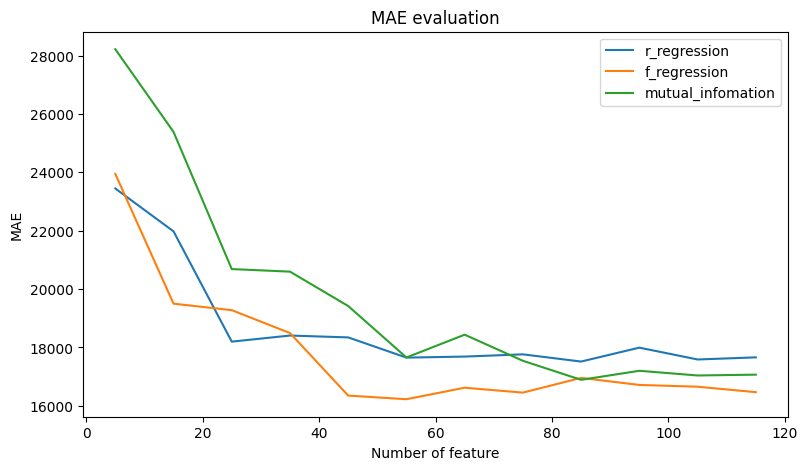

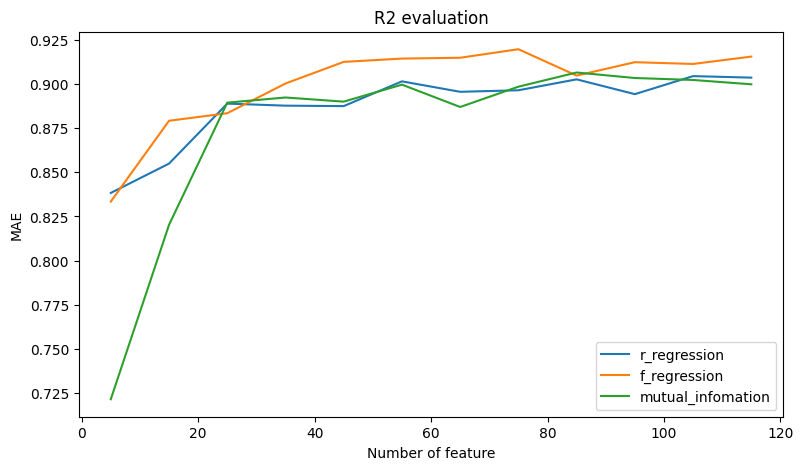

In [768]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()